In [213]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import warnings
warnings.simplefilter(action="ignore")

# Data Analysis

In [214]:
# Reading the dataset
d= pd.read_csv('crop_recommendation.csv')

In [215]:
d

,N,P,K,temperature,humidity,ph,rainfall,label
0,81,40,41,20.879744,82.002744,6.502985,202.935536,rice
1,81,53,37,21.770462,80.319644,7.038096,226.655537,rice
2,90,52,43,23.004459,82.320763,7.840207,263.964248,rice
3,81,43,37,26.491096,80.158363,6.980401,242.864034,rice
4,64,44,45,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,103,33,25,26.774637,66.413269,6.780064,177.774507,coffee
2196,86,39,26,27.417112,56.636362,6.086922,127.924610,coffee
2197,88,37,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,91,30,34,26.272418,52.127394,6.758793,127.175293,coffee


In [216]:
d.size
# Totel number of elements in the data

17600

In [217]:
d.shape

(2200, 8)

    Number of attributes in data are 8         
    Number of training examples in data are 2200

In [218]:
# attributes in the data
d.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Attributes Description

     1.N - ratio of Nitrogen content in soil
     2.P - ratio of Phosphorous content in soil
     3.K - ratio of Potassium content in soil
     4.temperature - temperature in degree Celsius
     5.humidity - relative humidity in %
     6.ph - ph value of the soil
     7.rainfall - rainfall in mm

In [219]:
d.describe()
# There are no empty elements in the data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.303182,53.050455,48.225455,25.616244,71.481779,6.469480,103.463655
std,37.413443,32.655222,50.558932,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,19.000000,28.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,49.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,85.000000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [220]:
d['label'].value_counts()
# Each crop consists of 100 training examples and there are 22 different crops

banana         100
cotton         100
mungbean       100
pigeonpeas     100
maize          100
kidneybeans    100
papaya         100
lentil         100
pomegranate    100
mothbeans      100
apple          100
watermelon     100
coffee         100
chickpea       100
orange         100
blackgram      100
coconut        100
jute           100
grapes         100
rice           100
mango          100
muskmelon      100
Name: label, dtype: int64

<Figure size 1368x1224 with 0 Axes>

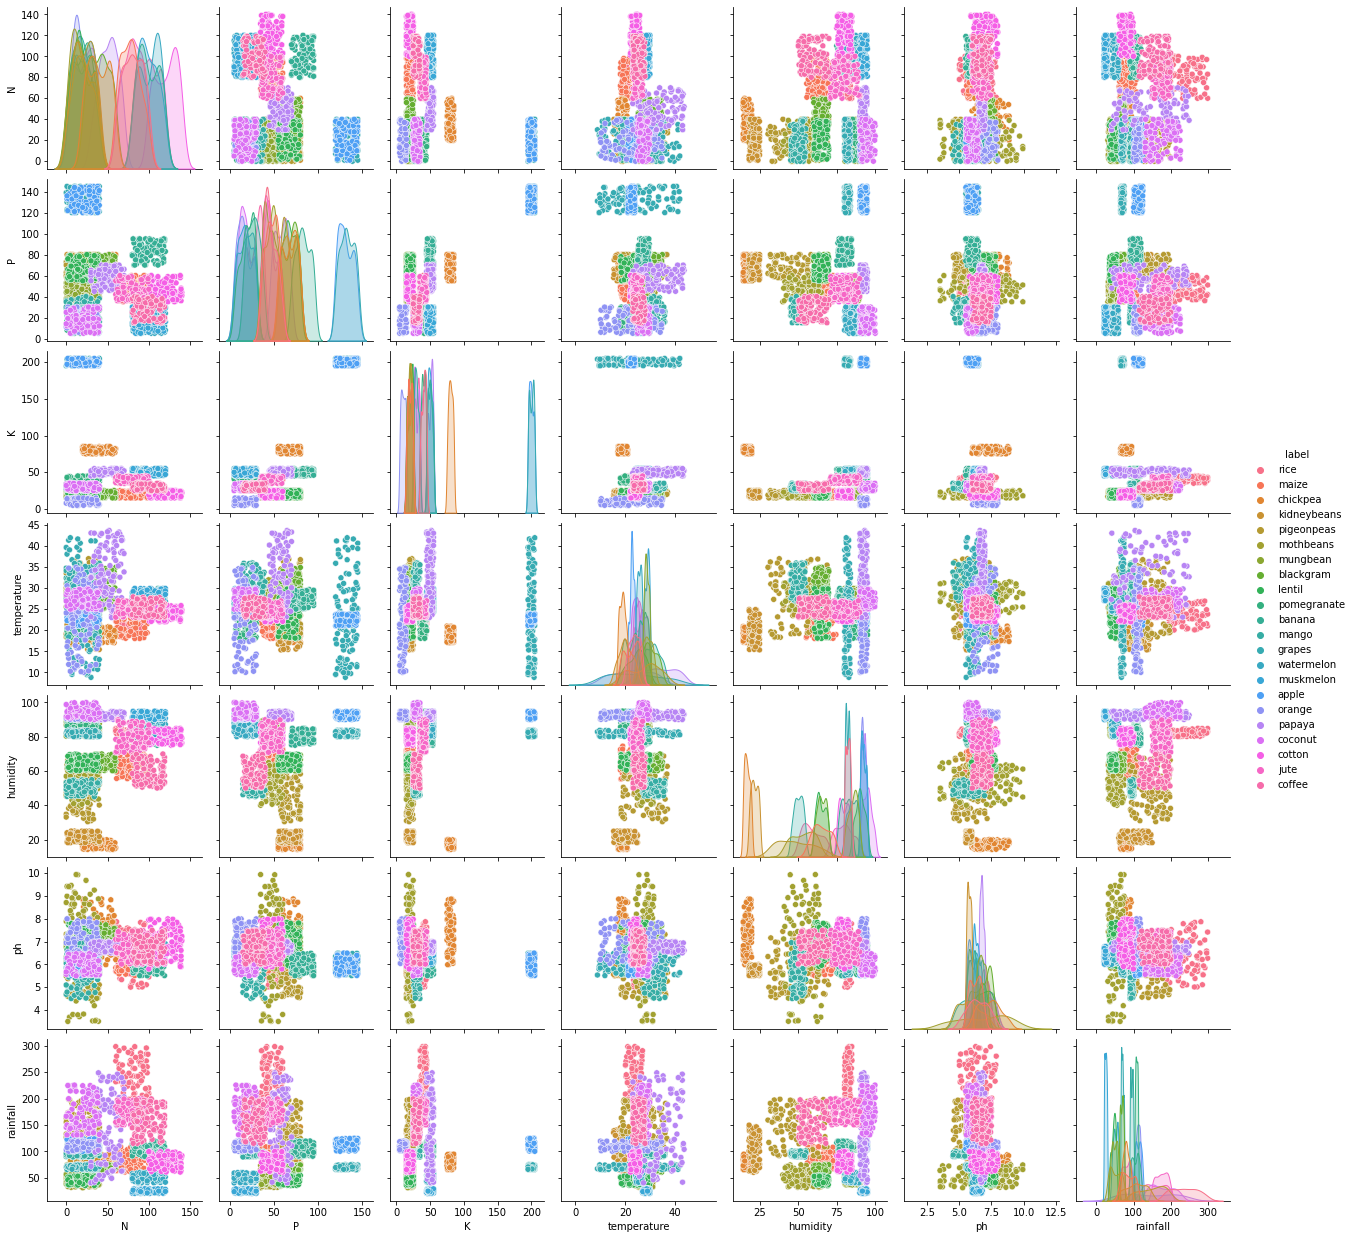

In [221]:
plt.figure(figsize=(19,17))
sns.pairplot(d, hue = "label")
plt.show()

### Seperating features and label

In [222]:
features = d[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = d['label']
labels = d['label']

In [223]:
# Creating empty lists to store the accuracy of model and it's name.
accuracy = []
model= []

### Splitting training and test sets

In [224]:
# 80% of data is randomly selected for training and 20% is used for testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Model Training 

## Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

# The hyperparameters used above in the model are found by using grid search.

DecisionTrees's Accuracy is:  95.0


In [226]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.94      1.00      0.97        17
   blackgram       0.76      1.00      0.86        16
    chickpea       1.00      0.95      0.98        21
     coconut       0.91      0.95      0.93        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.76      1.00      0.86        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.88      1.00      0.94        23
       maize       1.00      0.95      0.98        21
       mango       1.00      0.92      0.96        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [229]:
# Mean cross validation score
score.mean()

0.9472727272727273

In [230]:
# Saving trained Decision Tree model
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

<AxesSubplot:>

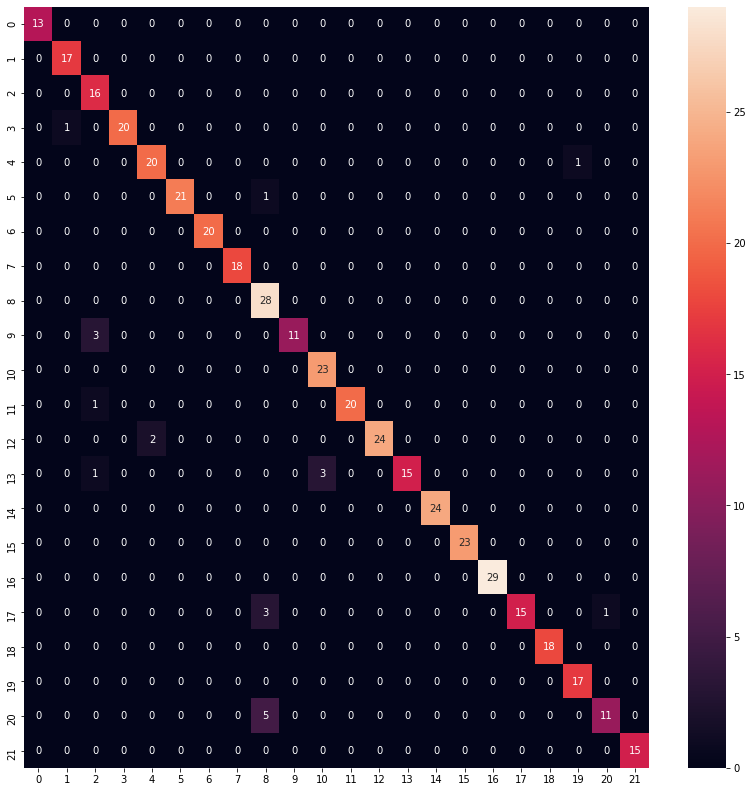

In [231]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Ytest,predicted_values)
plt.figure(figsize = (14,14))
sns.heatmap(cf,annot=True)

# Guassian Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

Naive Bayes's Accuracy is:  0.9886363636363636


In [233]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [234]:
score = cross_val_score(NaiveBayes,features,target,cv=5)

In [235]:
# cross validation score
score.mean()

0.9949999999999999

In [236]:
# saving trained Guassian Naive Bayes model.
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

<AxesSubplot:>

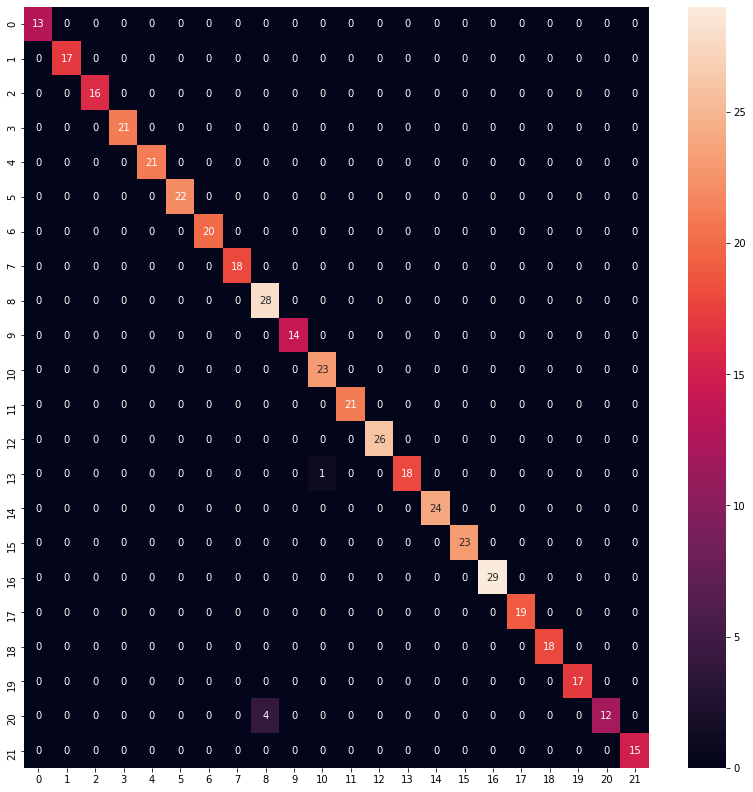

In [237]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Ytest,predicted_values)
plt.figure(figsize = (14,14))
sns.heatmap(cf,annot=True)

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.90      0.95      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       0.92      0.86      0.89        14
      lentil       0.91      0.91      0.91        23
       maize       0.95      0.90      0.93        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [239]:
score = cross_val_score(LogReg,features,target,cv=5)
score.mean()

0.9554545454545454

In [240]:
# Saving trained Logistic Regression model
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

<AxesSubplot:>

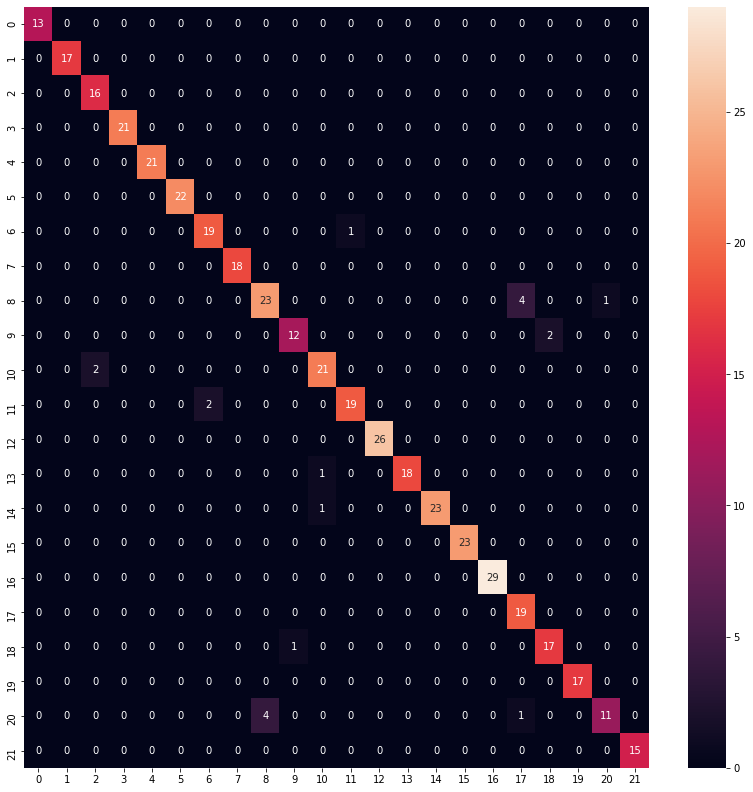

In [241]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Ytest,predicted_values)
plt.figure(figsize = (14,14))
sns.heatmap(cf,annot=True)

# Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier
RandF = RandomForestClassifier(n_estimators=20, random_state=0)
RandF.fit(Xtrain,Ytrain)
predicted_values = RandF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RandF')
print("RandF's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))
# The hyperparameters used above in the model are found by using grid search.

RandF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1

In [243]:
score = cross_val_score(RandF,features,target,cv=5)
score.mean()

0.9927272727272728

<AxesSubplot:>

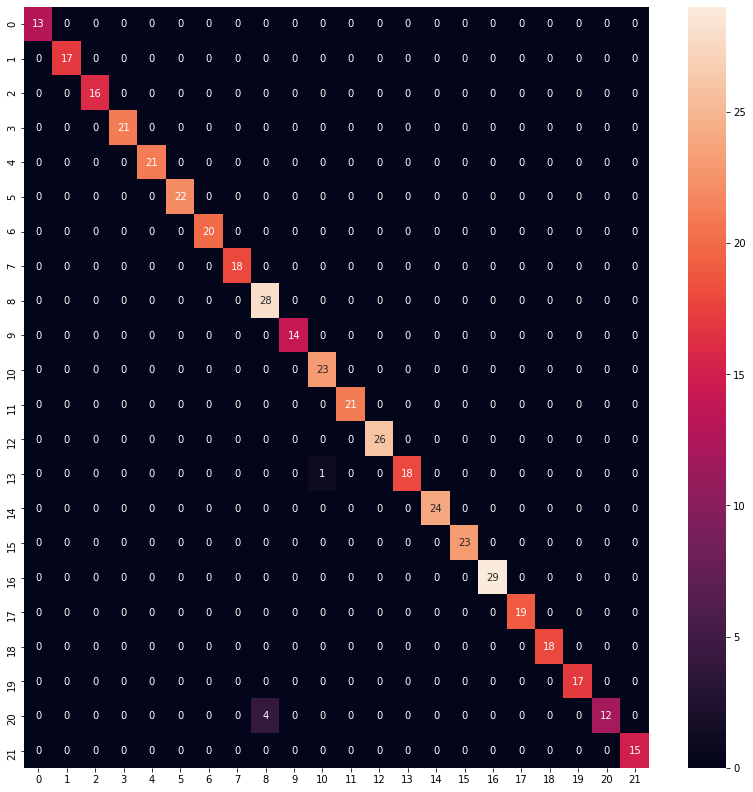

In [244]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Ytest,predicted_values)
plt.figure(figsize = (14,14))
sns.heatmap(cf,annot=True)

### Saving trained Random Forest model

In [245]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandF, RF_Model_pkl)
RF_Model_pkl.close()

# XGBoost

In [246]:
import xgboost as xgb
XB = xgb.XGBClassifier(eval_metric='merror')
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [247]:
score = cross_val_score(XB,features,target,cv=5)
score.mean()
# Mean cv score for xg boost model

0.989090909090909

<AxesSubplot:>

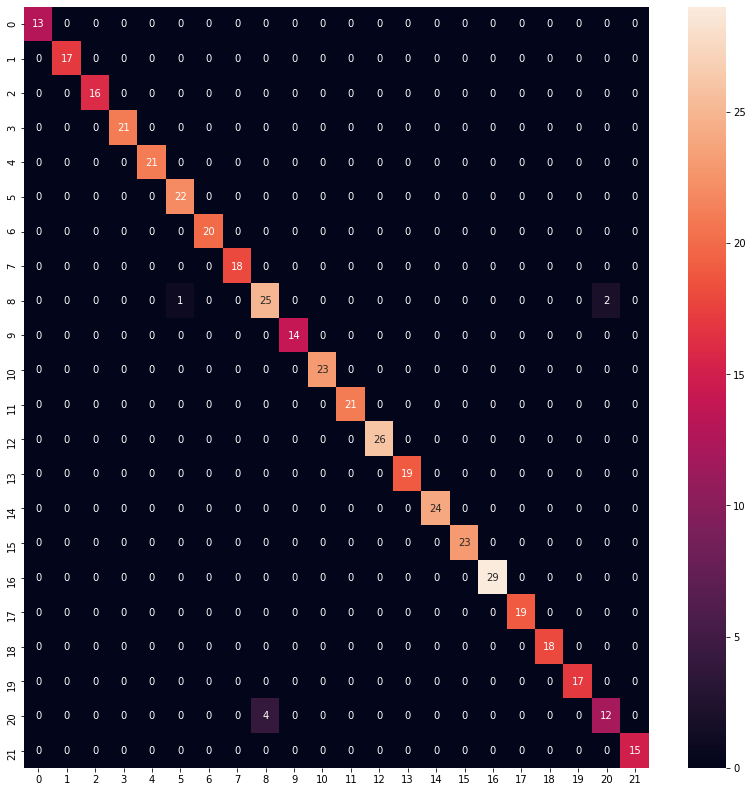

In [248]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Ytest,predicted_values)
plt.figure(figsize = (14,14))
sns.heatmap(cf,annot=True)

### Saving trained XGBoost model

In [249]:
import pickle
XB_pkl_filename = 'XGBoost.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

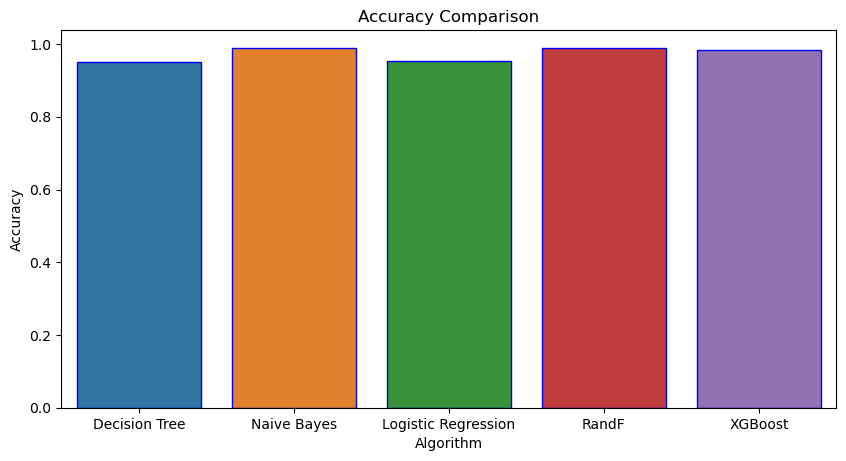

In [250]:
import seaborn as sns
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(x = model,y =accuracy,edgecolor="b")

In [251]:
l=len(accuracy)
for i in range(l):
    print (model[i], accuracy[i])

Decision Tree 0.95
Naive Bayes 0.9886363636363636
Logistic Regression 0.9545454545454546
RandF 0.9886363636363636
XGBoost 0.9840909090909091


## Recommending the crops

In [ ]:
# Random Forest model is used for final prediction.
N=input("Enter the nitrogen content in soil:")
P=input("Enter the Phosphorus content in soil:")
K=input("Enter the Potassium content in soil:")
temperature=input("Enter the average TEMPETATURE in your region:")
humidity=input("Enter the average HUMIDITY in your region:")
ph=input("Enter the content PH in soil:")
rainfall=input("Enter the average RAINFALL in your region:")
data = np.array([[N, P, K, temperature, humidity, ph,rainfall]])
prediction = RandF.predict(data)
print(prediction)
# Enter the information of your farm land here to get the suitable crop for your land.